In [18]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.max_columns', None)

In [130]:
df = pd.read_excel('data.xlsx', sheet_name='VU',skiprows=1).drop([0])

C:\Users\Evgenii\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [131]:
df

,Unnamed: 0,Unnamed: 1,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды.1,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,КГФ.1
1,804,2008-06-05 00:00:00,3576.3,7.94,249.6,370.1,101.8,249,359.6,101.8,53,31.7,103.2,32.5,214.704,83.6,0.4,231.24884,1610.368866,131.3,0.4,56.8,45.25,56.5,-,93.6,92.376018,0.806017,801,1000,0.669449,2.782623,311.9094,NaN
2,804,2008-06-06 00:00:00,3576.3,9.53,233.5,364.6,101.3,231,338.1,102.4,58.8,37.6,103,38.6,290.594,104.7,1.4,309.00166,2310.226429,158.5,1.4,56.8,45.25,56.5,-,92.9,91.685171,0.806017,801,1000,0.669449,3.697781,288.6003,NaN
3,804,2008-06-07 00:00:00,3576.3,11.11,213.4,357.1,101.6,211,314.8,100.6,63.6,42.8,102.6,43.4,368.042,114.3,1.9,388.11498,3039.48968,172.3,1.9,56.8,45.25,56.5,-,91.4,90.204787,0.806017,801,1000,0.669449,4.515073,248.7906,NaN
4,804,2008-06-08 00:00:00,3576.3,12.7,191.6,347.4,98.4,187,291.5,99,64.7,46.2,102,46.1,434.663,121.3,3.3,455.21452,3824.082686,181.5,3.3,56.8,45.25,56.5,-,89.2,88.033555,0.806017,801,1000,0.669449,5.217673,223.5591,NaN
5,804,2008-06-09 00:00:00,3576.3,14.29,171.9,337.7,99.2,169,270.3,99.5,64,49.4,104.4,49.9,483.283,129.8,4.6,504.58778,4299.104676,190.6,4.7,56.8,45.25,56.5,-,89.7,88.527017,0.806017,801,1000,0.669449,5.765092,215.1486,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,22505,2009-09-23 00:00:00,3678,12.7,182.2,271.586,93.255111,179,258.6,92.702141,55.6,41.8,104.91,41.832731,394.6,85.1,1.5,408.96638,3728,128.3,1.5,46.7435,36.96,60.9,60.8,89.7,88.527017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,22505,2009-09-27 00:00:00,3678,14.29,157,249.076,96.472143,153,233.5,100.060417,56.7,47.6,104.5,47.715357,455.6,89.4,1.7,471.00532,4302,135.9,1.7,46.7435,36.96,60.9,60.8,87.3,86.158401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,22505,2010-04-09 00:00:00,3679.5,7.94,211.9,289.3877,91.131226,208,289.6,91.304642,47,24.4,104.903,24.84165,188.434,61.47,1.118,200.870499,1550,92.4,1.1,46.7435,38.65317,64.1,61.3,88.2,87.046632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,22505,2010-04-14 00:00:00,3679.5,9.53,204,282.8709,91.173008,201,275.3,91.616821,48.9,26.7,104.882,31.58044,261.036,72.91,4.748,273.705215,2265,108.9,4.8,46.7435,38.65317,64.1,61.3,88.5,87.342709,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Удалить строки, где обе целевых переменные пустые

In [132]:
df = df.drop(df[(df.G_total	.isnull()) & (df.КГФ.isnull()) & (df['КГФ.1'].isnull())].index)

In [133]:
df['КГФ'] = df['КГФ'].fillna(0) + 1000*df['КГФ.1'].fillna(0)

In [134]:
len(df)

93

In [135]:
df

,Unnamed: 0,Unnamed: 1,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды.1,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,КГФ.1
1,804,2008-06-05 00:00:00,3576.3,7.94,249.6,370.1,101.8,249,359.6,101.8,53,31.7,103.2,32.5,214.704,83.6,0.4,231.24884,1610.368866,131.3,0.4,56.8,45.25,56.5,-,93.6,92.376018,0.806017,801,1000,0.669449,2.782623,311.9094,NaN
2,804,2008-06-06 00:00:00,3576.3,9.53,233.5,364.6,101.3,231,338.1,102.4,58.8,37.6,103,38.6,290.594,104.7,1.4,309.00166,2310.226429,158.5,1.4,56.8,45.25,56.5,-,92.9,91.685171,0.806017,801,1000,0.669449,3.697781,288.6003,NaN
3,804,2008-06-07 00:00:00,3576.3,11.11,213.4,357.1,101.6,211,314.8,100.6,63.6,42.8,102.6,43.4,368.042,114.3,1.9,388.11498,3039.48968,172.3,1.9,56.8,45.25,56.5,-,91.4,90.204787,0.806017,801,1000,0.669449,4.515073,248.7906,NaN
4,804,2008-06-08 00:00:00,3576.3,12.7,191.6,347.4,98.4,187,291.5,99,64.7,46.2,102,46.1,434.663,121.3,3.3,455.21452,3824.082686,181.5,3.3,56.8,45.25,56.5,-,89.2,88.033555,0.806017,801,1000,0.669449,5.217673,223.5591,NaN
5,804,2008-06-09 00:00:00,3576.3,14.29,171.9,337.7,99.2,169,270.3,99.5,64,49.4,104.4,49.9,483.283,129.8,4.6,504.58778,4299.104676,190.6,4.7,56.8,45.25,56.5,-,89.7,88.527017,0.806017,801,1000,0.669449,5.765092,215.1486,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,22503,2009-01-28 00:00:00,3284,12.7,215,307.8,98.6,215,308.1,97.2,65,45.8,104.78,46.3,479.085,93.5,4.7,495.62985,4165,156.8,4.8,44.5,35.28,40.5,41.6,94.4,93.165556,NaN,782,NaN,0.66,NaN,153.0000,0.153
165,22503,2009-02-01 00:00:00,3284,14.29,198,293.6,98.5,197,293.9,98.4,66.9,49.8,104.63,50.5,568.497,106.6,6.4,587.36094,5113,174.3,6.5,44.5,35.28,40.5,41.6,94,92.770787,NaN,782,NaN,0.66,NaN,147.0000,0.147
166,22503,2010-08-16 00:00:00,3288.6,7.94,231.229167,309.1,92.6,230,307.1,92.7,51,-,104.4,28.1,215.803,50.5,0.448917,224.858099,1759,84.7,0.4,48.3747,33.21,-,-,89.9,88.724402,NaN,779.6,NaN,0.668,NaN,182.0000,0.182
167,22503,2010-08-20 00:00:00,3288.6,11.11,217.201681,293.9,93.1,215,293.9,93.3,60,-,104.6,41.3,387.675,72,1.5,403.7469,3454,123,1.6,48.3747,33.21,-,-,90.8,89.612633,NaN,779.6,NaN,0.668,NaN,145.0000,0.145


In [136]:
df = df.drop(['Unnamed: 0','Unnamed: 1','КГФ.1'],axis=1)

Пропуски заполнить NaN

In [137]:
df = df.replace(r'-', np.nan, regex=True).replace(r'не спускался', np.nan, regex=True)

In [138]:
df

,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды.1,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
1,3576.3,7.94,249.600000,370.1,101.800000,249.0,359.6,101.800,53.0,31.7,103.20,32.500000,214.704,83.6,0.400000,231.248840,1610.368866,131.3,0.4,56.8000,45.25,56.5,NaN,93.6,92.376018,0.806017,801.0,1000.0,0.669449,2.782623,311.9094
2,3576.3,9.53,233.500000,364.6,101.300000,231.0,338.1,102.400,58.8,37.6,103.00,38.600000,290.594,104.7,1.400000,309.001660,2310.226429,158.5,1.4,56.8000,45.25,56.5,NaN,92.9,91.685171,0.806017,801.0,1000.0,0.669449,3.697781,288.6003
3,3576.3,11.11,213.400000,357.1,101.600000,211.0,314.8,100.600,63.6,42.8,102.60,43.400000,368.042,114.3,1.900000,388.114980,3039.489680,172.3,1.9,56.8000,45.25,56.5,NaN,91.4,90.204787,0.806017,801.0,1000.0,0.669449,4.515073,248.7906
4,3576.3,12.70,191.600000,347.4,98.400000,187.0,291.5,99.000,64.7,46.2,102.00,46.100000,434.663,121.3,3.300000,455.214520,3824.082686,181.5,3.3,56.8000,45.25,56.5,NaN,89.2,88.033555,0.806017,801.0,1000.0,0.669449,5.217673,223.5591
5,3576.3,14.29,171.900000,337.7,99.200000,169.0,270.3,99.500,64.0,49.4,104.40,49.900000,483.283,129.8,4.600000,504.587780,4299.104676,190.6,4.7,56.8000,45.25,56.5,NaN,89.7,88.527017,0.806017,801.0,1000.0,0.669449,5.765092,215.1486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,3284.0,12.70,215.000000,307.8,98.600000,215.0,308.1,97.200,65.0,45.8,104.78,46.300000,479.085,93.5,4.700000,495.629850,4165.000000,156.8,4.8,44.5000,35.28,40.5,41.6,94.4,93.165556,NaN,782.0,NaN,0.660000,NaN,153.0000
165,3284.0,14.29,198.000000,293.6,98.500000,197.0,293.9,98.400,66.9,49.8,104.63,50.500000,568.497,106.6,6.400000,587.360940,5113.000000,174.3,6.5,44.5000,35.28,40.5,41.6,94.0,92.770787,NaN,782.0,NaN,0.660000,NaN,147.0000
166,3288.6,7.94,231.229167,309.1,92.600000,230.0,307.1,92.700,51.0,NaN,104.40,28.100000,215.803,50.5,0.448917,224.858099,1759.000000,84.7,0.4,48.3747,33.21,NaN,NaN,89.9,88.724402,NaN,779.6,NaN,0.668000,NaN,182.0000
167,3288.6,11.11,217.201681,293.9,93.100000,215.0,293.9,93.300,60.0,NaN,104.60,41.300000,387.675,72.0,1.500000,403.746900,3454.000000,123.0,1.6,48.3747,33.21,NaN,NaN,90.8,89.612633,NaN,779.6,NaN,0.668000,NaN,145.0000


Сохранить названия признаков

In [139]:
df.drop(columns = ['G_total','КГФ']).columns

Index(['Глубина манометра', 'Dшт', 'Руст', 'Рзаб', 'Pлин', 'Руст.1', 'Рзаб.1',
       'Рлин', 'Туст', 'Тна шлейфе', 'Тзаб', 'Tлин', 'Дебит газа',
       'Дебит ст. конд.', 'Дебит воды', 'Дебит смеси', 'Дебит гааз',
       'Дебит кон нестабильный', 'Дебит воды.1', 'Нэф',
       'Рпл. Тек (послед точка на КВД)', 'Рпл. Тек (Расчет по КВД)',
       'Рпл. Тек (Карноухов)', 'Pсб', 'Pсб.1', 'Ro_g', 'Ro_c', 'Ro_w',
       'Удельная плотность газа '],
      dtype='object')

In [140]:
df_to_regressor = df.fillna(-100)

In [141]:
df_without_nan = df.dropna()

In [142]:
len(df_to_regressor)

93

Построить гистраграмму важности признаков

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

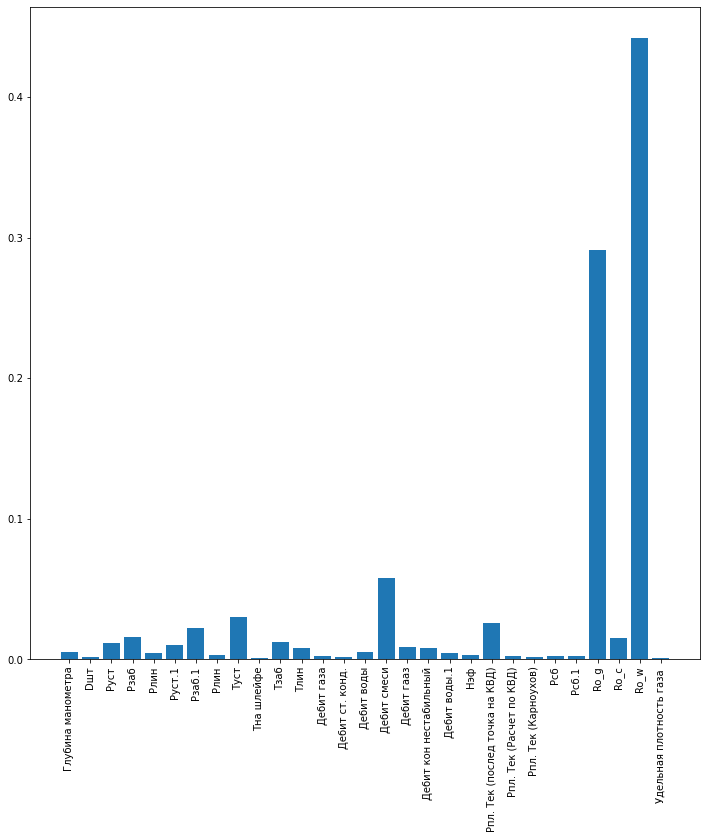

In [143]:
clf = RandomForestRegressor()
clf.fit(df_to_regressor.drop(columns=['G_total','КГФ']), df_to_regressor[['G_total','КГФ']])
# create a figure to plot a bar, where x axis is features, and Y indicating the importance of each feature
plt.figure(figsize=(12,12))
plt.bar(df_to_regressor.drop(columns=['G_total','КГФ']).columns, clf.feature_importances_)
plt.xticks(rotation=90)

Построить тепловую карту признаков

In [115]:
df_cor = df_to_regressor
df_cor.corr().abs().style.background_gradient(cmap='YlOrRd')

,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды.1,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
Глубина манометра,1.000000,0.062116,0.098709,0.827542,0.063114,0.094173,0.825145,0.092741,0.084990,0.262866,0.974458,0.126249,0.027456,0.057761,0.158457,0.043484,0.017914,0.129845,0.162032,0.120017,0.767861,0.482957,0.271087,0.072704,0.072704,0.053932,0.047761,0.053956,0.042841,0.052120,0.176547
Dшт,0.062116,1.000000,0.386698,0.176886,0.002905,0.389556,0.181713,0.108719,0.542294,0.122597,0.093429,0.820960,0.865622,0.621313,0.536016,0.737100,0.894719,0.508455,0.533391,0.167398,0.024412,0.001158,0.096921,0.027716,0.027716,0.202910,0.093584,0.202914,0.194179,0.211447,0.231636
Руст,0.098709,0.386698,1.000000,0.595721,0.296006,0.999288,0.608011,0.136337,0.107952,0.051032,0.079586,0.135867,0.068104,0.307248,0.099397,0.065550,0.068843,0.306643,0.105785,0.208647,0.153236,0.066512,0.255999,0.174191,0.174191,0.195596,0.109322,0.195528,0.380945,0.197275,0.494718
Рзаб,0.827542,0.176886,0.595721,1.000000,0.125763,0.591197,0.992389,0.026361,0.059124,0.241240,0.813505,0.089478,0.101034,0.291978,0.223295,0.095758,0.029437,0.131042,0.226942,0.202320,0.705079,0.433914,0.360285,0.010188,0.010188,0.179885,0.017726,0.179867,0.240155,0.180167,0.419647
Pлин,0.063114,0.002905,0.296006,0.125763,1.000000,0.302257,0.115313,0.583154,0.058946,0.157003,0.076226,0.392389,0.163266,0.202829,0.141473,0.070287,0.042140,0.231237,0.147008,0.012936,0.098885,0.026776,0.057449,0.176807,0.176807,0.078815,0.056802,0.078910,0.316899,0.073844,0.141389
Руст.1,0.094173,0.389556,0.999288,0.591197,0.302257,1.000000,0.605091,0.143812,0.108682,0.041092,0.076740,0.128432,0.066578,0.299897,0.098633,0.062579,0.071013,0.294251,0.103317,0.200159,0.147097,0.064443,0.257389,0.174389,0.174389,0.179902,0.113124,0.179831,0.383703,0.181751,0.481088
Рзаб.1,0.825145,0.181713,0.608011,0.992389,0.115313,0.605091,1.000000,0.018877,0.032525,0.209260,0.813893,0.102188,0.103802,0.287038,0.205400,0.086171,0.030674,0.129068,0.208820,0.186858,0.701133,0.431064,0.403052,0.021865,0.021865,0.143680,0.030403,0.143663,0.231943,0.144334,0.406368
Рлин,0.092741,0.108719,0.136337,0.026361,0.583154,0.143812,0.018877,1.000000,0.065674,0.219119,0.070795,0.186938,0.058004,0.056779,0.145543,0.123692,0.163535,0.073506,0.146641,0.165191,0.082106,0.065105,0.064711,0.081058,0.081058,0.013110,0.049219,0.013045,0.194180,0.016474,0.167872
Туст,0.084990,0.542294,0.107952,0.059124,0.058946,0.108682,0.032525,0.065674,1.000000,0.447719,0.136650,0.610395,0.657424,0.538248,0.554249,0.754260,0.656935,0.434596,0.551290,0.343119,0.073529,0.132189,0.169032,0.473788,0.473788,0.237576,0.198077,0.237511,0.395451,0.244325,0.170377
Тна шлейфе,0.262866,0.122597,0.051032,0.241240,0.157003,0.041092,0.209260,0.219119,0.447719,1.000000,0.236965,0.044682,0.145061,0.196688,0.391887,0.250593,0.192924,0.145741,0.398432,0.222405,0.228230,0.057673,0.128673,0.533390,0.533390,0.227016,0.160242,0.227000,0.043107,0.227683,0.075464


Для каждого признака построить график распределения с отложенными на нем линиями первого и третьего квартилей

C:\Users\Evgenii\AppData\Local\Temp\ipykernel_6648\3551670754.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,1), dpi= 80)


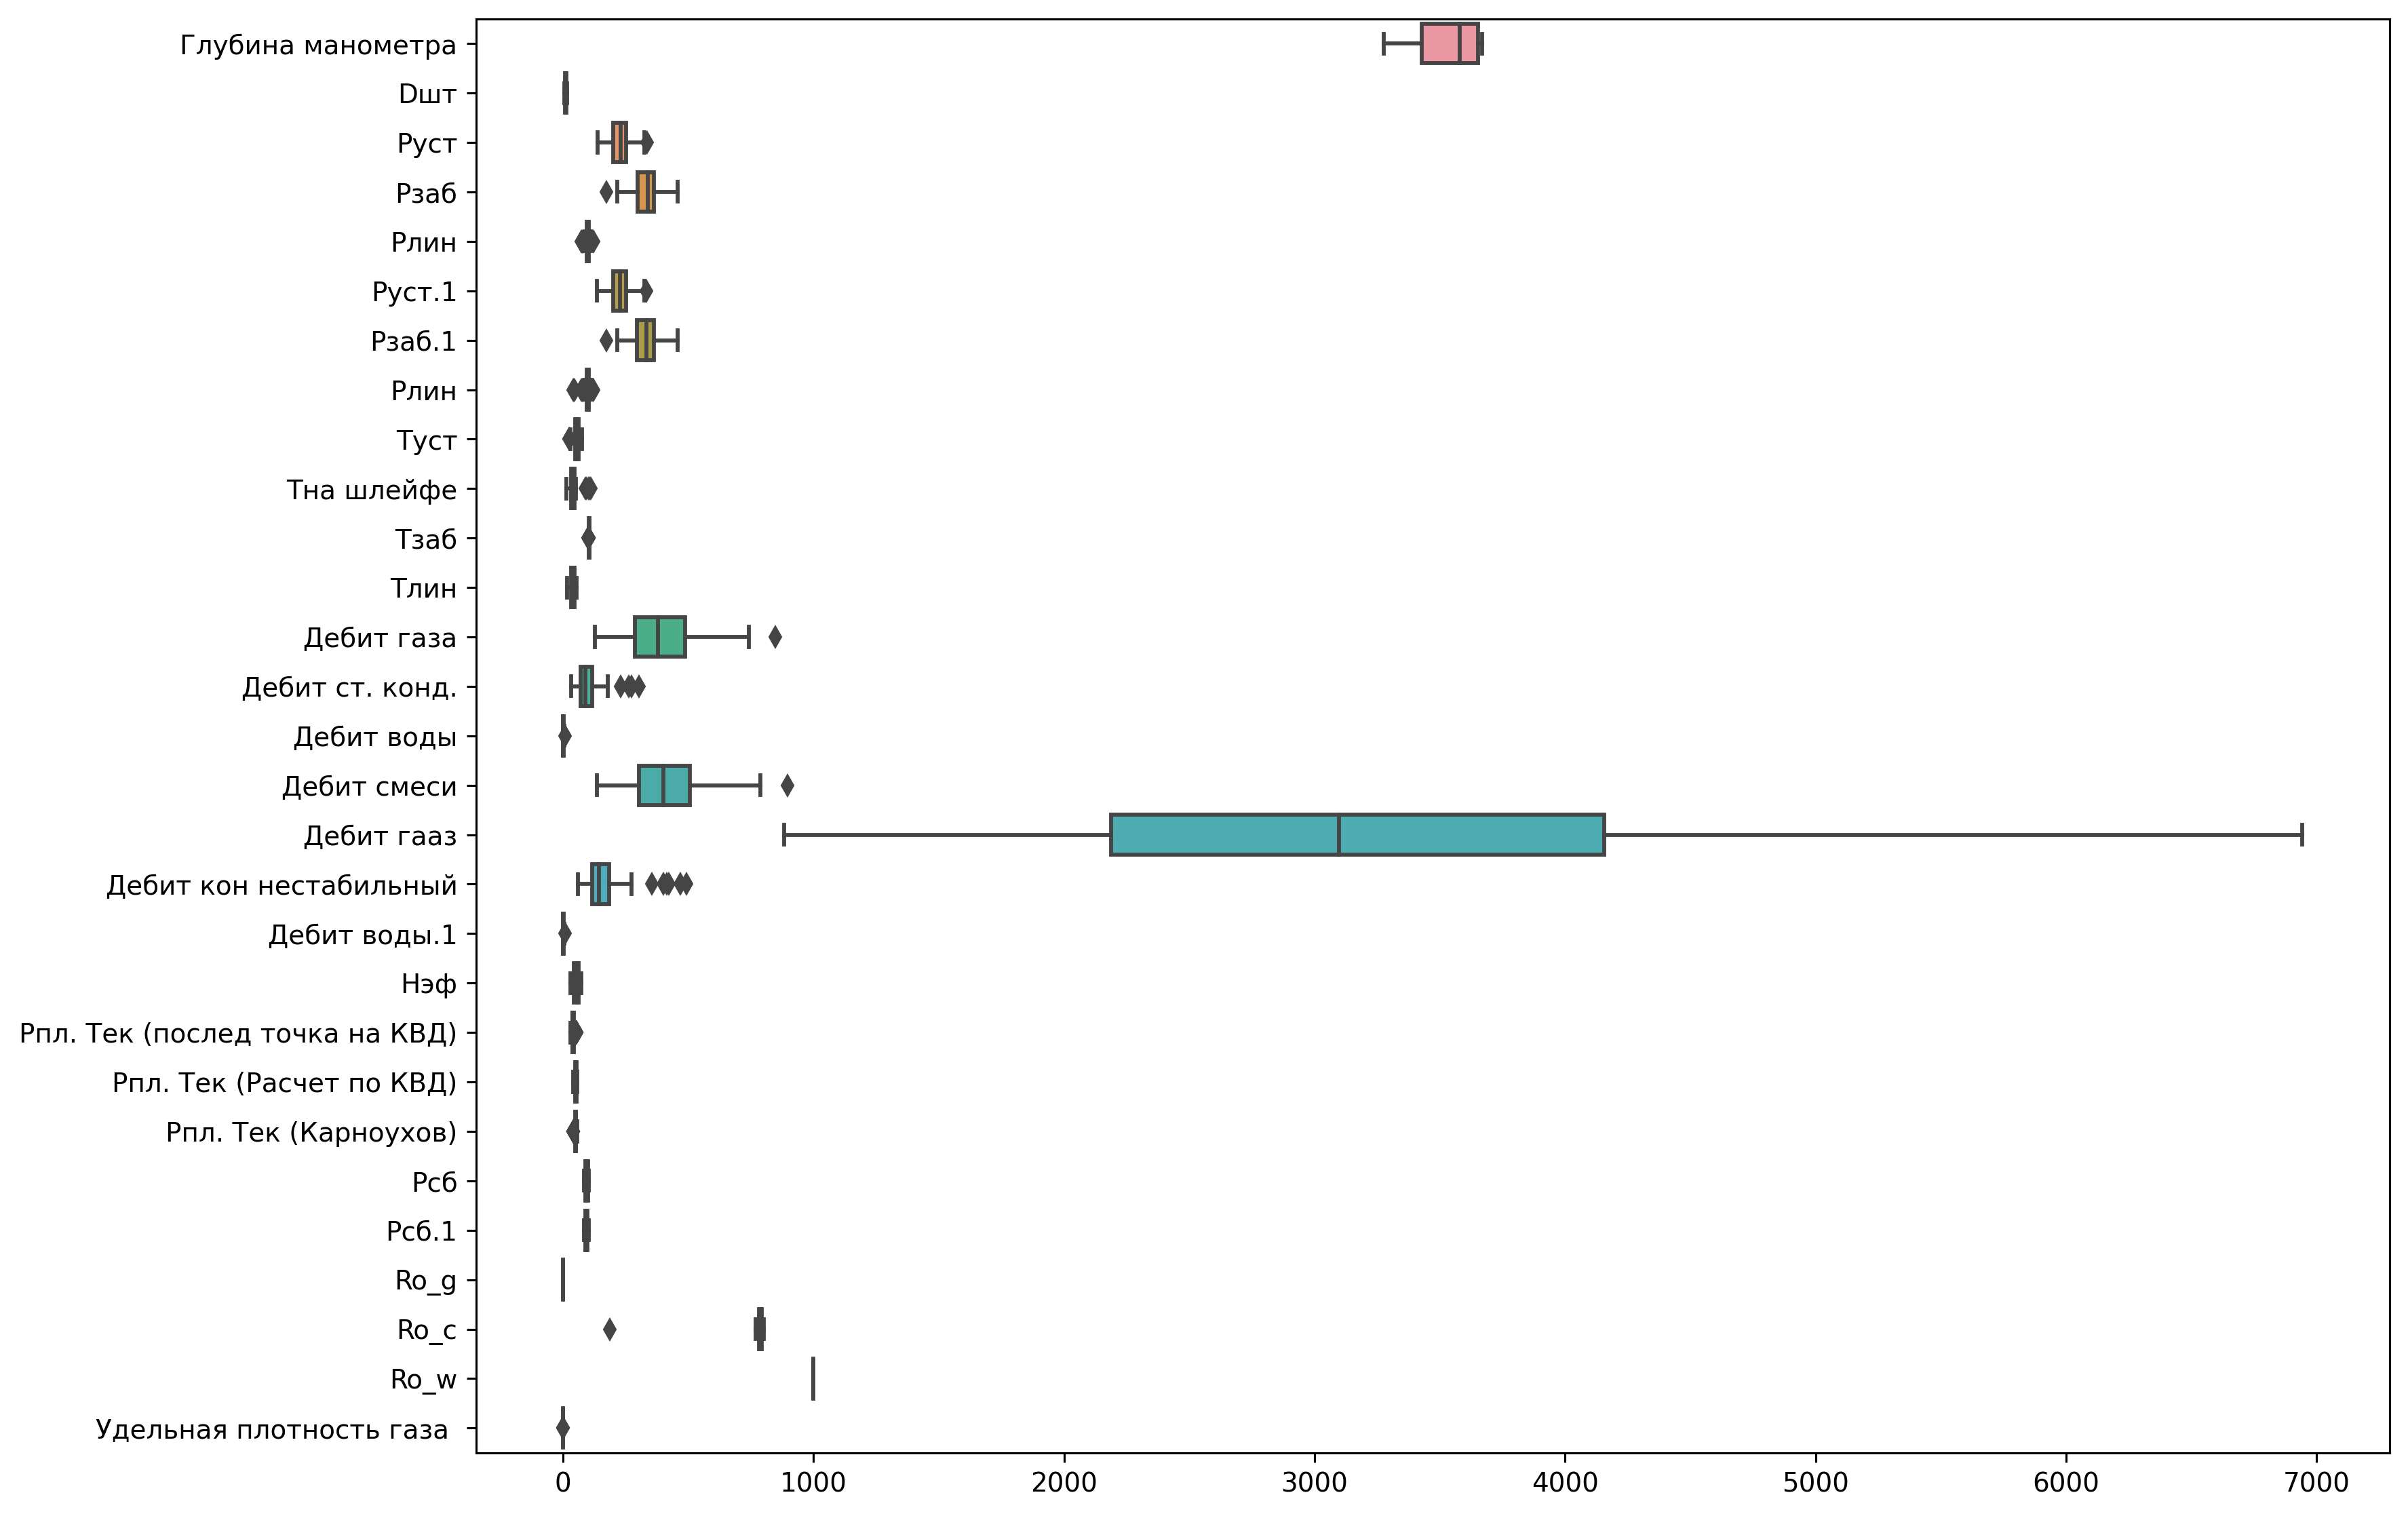

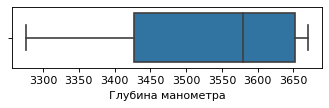

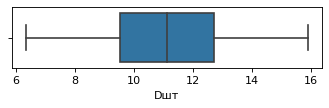

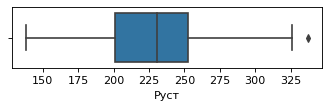

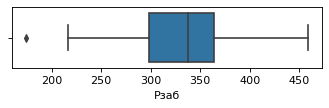

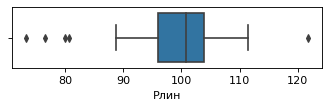

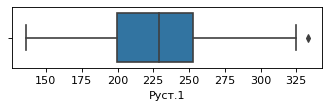

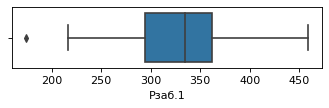

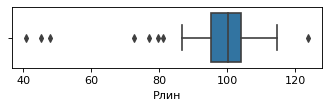

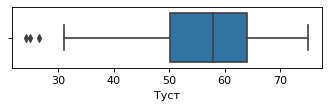

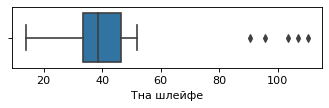

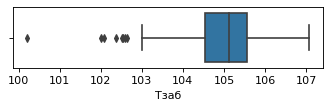

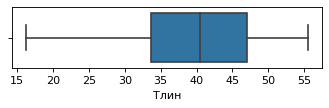

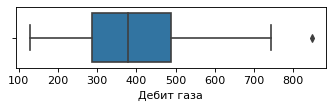

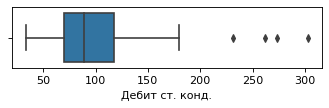

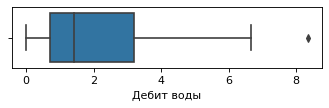

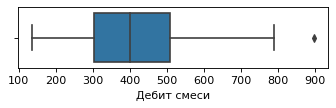

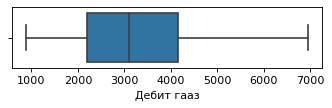

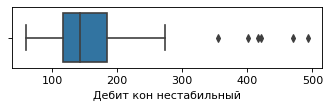

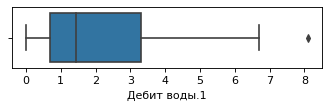

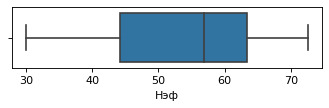

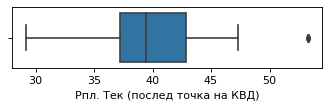

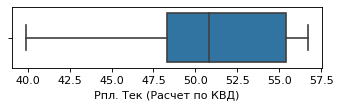

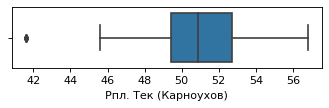

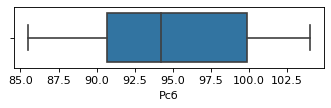

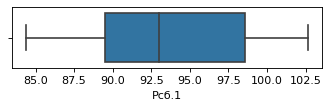

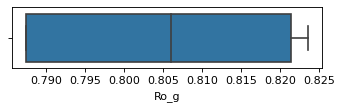

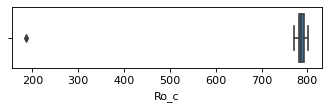

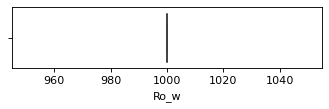

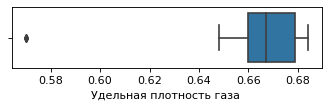

In [104]:
plt.figure(figsize=(13,10), dpi= 280)
sns.boxplot(data=df.drop([37]).drop(columns=['G_total','КГФ']),orient='h')
for column in df.drop(columns=['G_total','КГФ']).columns:
    plt.figure(figsize=(5,1), dpi= 80)
    sns.boxplot(x=df[column].drop([37]),orient='h')

Для каждого признака посчитать элементы описательной статистики

In [145]:
for column in df.drop(columns=['G_total','КГФ']).columns:
    print(column, 'NaN:', round(df[column].isna().sum()/len(df[column])*100),'min:',round(df[column].min(),2), 'mean:',round(df[column].mean(),1),
          'q1:', round(df[column].quantile(0.2465),1),'median:', round(df[column].median(),1), 
          'q3:',  round(df[column].quantile(0.7535),1), 'max:', round(df[column].max(),1),
          'std:', round(df[column].std(),1), 'interq:', round(df[column].quantile(0.7535)-df[column].quantile(0.2465),1), df[column].nunique()
         )

Глубина манометра NaN: 3 min: 3276.0 mean: 3524.1 q1: 3424.5 median: 3579.0 q3: 3653.0 max: 3670.0 std: 144.5 interq: 228.5 20
Dшт NaN: 0 min: 6.35 mean: 11.0 q1: 9.5 median: 11.1 q3: 12.7 max: 15.9 std: 2.4 interq: 3.2 10
Руст NaN: 0 min: 138.16 mean: 228.3 q1: 201.1 median: 229.9 q3: 252.7 max: 337.1 std: 41.9 interq: 51.6 87
Рзаб NaN: 3 min: 174.0 mean: 331.8 q1: 297.5 median: 337.8 q3: 364.6 max: 458.6 std: 56.5 interq: 67.1 88
Pлин NaN: 0 min: 73.31 mean: 99.9 q1: 95.9 median: 100.8 q3: 103.9 max: 121.7 std: 7.3 interq: 8.1 91
Руст.1 NaN: 0 min: 136.0 mean: 227.6 q1: 199.8 median: 228.0 q3: 252.7 max: 333.0 std: 41.8 interq: 52.9 73
Рзаб.1 NaN: 3 min: 174.0 mean: 330.3 q1: 293.9 median: 334.2 q3: 363.0 max: 458.5 std: 56.4 interq: 69.1 89
Рлин NaN: 0 min: 40.74 mean: 98.0 q1: 95.2 median: 100.3 q3: 104.0 max: 123.6 std: 12.4 interq: 8.8 88
Туст NaN: 0 min: 24.2 mean: 56.2 q1: 50.2 median: 58.0 q3: 64.2 max: 75.0 std: 11.3 interq: 14.0 51
Тна шлейфе NaN: 35 min: 14.0 mean: 43.1 q1:

In [106]:
(1+np.log2(len(df_to_regressor)))

7.539158811108031

## Делаем one-hot encoding признака Репл_тек и Dшт

In [150]:
df['D']=pd.qcut(df['Dшт'], q=7, labels=['a','b','c','d','e','f','g'])

In [151]:
df = pd.concat([df,pd.get_dummies(df.D, prefix='D')],axis=1)

In [146]:
df['Рпл']=pd.qcut(df['Рпл. Тек (послед точка на КВД)'], q=7, labels=['a','b','c','d','e','f','g'])

In [148]:
df = pd.concat([df,pd.get_dummies(df.Рпл, prefix='Рпл. Тек')],axis=1)

## Датасет после one-hot encoding признака Репл_тек и Dшт

In [149]:
df.drop(['Рпл','Рпл. Тек (послед точка на КВД)'],axis=1)

,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды.1,Нэф,Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,Рпл. Тек_a,Рпл. Тек_b,Рпл. Тек_c,Рпл. Тек_d,Рпл. Тек_e,Рпл. Тек_f,Рпл. Тек_g
1,3576.3,7.94,249.600000,370.1,101.800000,249.0,359.6,101.800,53.0,31.7,103.20,32.500000,214.704,83.6,0.400000,231.248840,1610.368866,131.3,0.4,56.8000,56.5,NaN,93.6,92.376018,0.806017,801.0,1000.0,0.669449,2.782623,311.9094,0,0,0,0,0,1,0
2,3576.3,9.53,233.500000,364.6,101.300000,231.0,338.1,102.400,58.8,37.6,103.00,38.600000,290.594,104.7,1.400000,309.001660,2310.226429,158.5,1.4,56.8000,56.5,NaN,92.9,91.685171,0.806017,801.0,1000.0,0.669449,3.697781,288.6003,0,0,0,0,0,1,0
3,3576.3,11.11,213.400000,357.1,101.600000,211.0,314.8,100.600,63.6,42.8,102.60,43.400000,368.042,114.3,1.900000,388.114980,3039.489680,172.3,1.9,56.8000,56.5,NaN,91.4,90.204787,0.806017,801.0,1000.0,0.669449,4.515073,248.7906,0,0,0,0,0,1,0
4,3576.3,12.70,191.600000,347.4,98.400000,187.0,291.5,99.000,64.7,46.2,102.00,46.100000,434.663,121.3,3.300000,455.214520,3824.082686,181.5,3.3,56.8000,56.5,NaN,89.2,88.033555,0.806017,801.0,1000.0,0.669449,5.217673,223.5591,0,0,0,0,0,1,0
5,3576.3,14.29,171.900000,337.7,99.200000,169.0,270.3,99.500,64.0,49.4,104.40,49.900000,483.283,129.8,4.600000,504.587780,4299.104676,190.6,4.7,56.8000,56.5,NaN,89.7,88.527017,0.806017,801.0,1000.0,0.669449,5.765092,215.1486,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,3284.0,12.70,215.000000,307.8,98.600000,215.0,308.1,97.200,65.0,45.8,104.78,46.300000,479.085,93.5,4.700000,495.629850,4165.000000,156.8,4.8,44.5000,40.5,41.6,94.4,93.165556,NaN,782.0,NaN,0.660000,NaN,153.0000,1,0,0,0,0,0,0
165,3284.0,14.29,198.000000,293.6,98.500000,197.0,293.9,98.400,66.9,49.8,104.63,50.500000,568.497,106.6,6.400000,587.360940,5113.000000,174.3,6.5,44.5000,40.5,41.6,94.0,92.770787,NaN,782.0,NaN,0.660000,NaN,147.0000,1,0,0,0,0,0,0
166,3288.6,7.94,231.229167,309.1,92.600000,230.0,307.1,92.700,51.0,NaN,104.40,28.100000,215.803,50.5,0.448917,224.858099,1759.000000,84.7,0.4,48.3747,NaN,NaN,89.9,88.724402,NaN,779.6,NaN,0.668000,NaN,182.0000,1,0,0,0,0,0,0
167,3288.6,11.11,217.201681,293.9,93.100000,215.0,293.9,93.300,60.0,NaN,104.60,41.300000,387.675,72.0,1.500000,403.746900,3454.000000,123.0,1.6,48.3747,NaN,NaN,90.8,89.612633,NaN,779.6,NaN,0.668000,NaN,145.0000,1,0,0,0,0,0,0


In [152]:
df.drop(['Dшт'],axis=1)

,Глубина манометра,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды.1,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,Рпл,Рпл. Тек_a,Рпл. Тек_b,Рпл. Тек_c,Рпл. Тек_d,Рпл. Тек_e,Рпл. Тек_f,Рпл. Тек_g,D,D_a,D_b,D_c,D_d,D_e,D_f,D_g
1,3576.3,249.600000,370.1,101.800000,249.0,359.6,101.800,53.0,31.7,103.20,32.500000,214.704,83.6,0.400000,231.248840,1610.368866,131.3,0.4,56.8000,45.25,56.5,NaN,93.6,92.376018,0.806017,801.0,1000.0,0.669449,2.782623,311.9094,f,0,0,0,0,0,1,0,a,1,0,0,0,0,0,0
2,3576.3,233.500000,364.6,101.300000,231.0,338.1,102.400,58.8,37.6,103.00,38.600000,290.594,104.7,1.400000,309.001660,2310.226429,158.5,1.4,56.8000,45.25,56.5,NaN,92.9,91.685171,0.806017,801.0,1000.0,0.669449,3.697781,288.6003,f,0,0,0,0,0,1,0,b,0,1,0,0,0,0,0
3,3576.3,213.400000,357.1,101.600000,211.0,314.8,100.600,63.6,42.8,102.60,43.400000,368.042,114.3,1.900000,388.114980,3039.489680,172.3,1.9,56.8000,45.25,56.5,NaN,91.4,90.204787,0.806017,801.0,1000.0,0.669449,4.515073,248.7906,f,0,0,0,0,0,1,0,d,0,0,0,1,0,0,0
4,3576.3,191.600000,347.4,98.400000,187.0,291.5,99.000,64.7,46.2,102.00,46.100000,434.663,121.3,3.300000,455.214520,3824.082686,181.5,3.3,56.8000,45.25,56.5,NaN,89.2,88.033555,0.806017,801.0,1000.0,0.669449,5.217673,223.5591,f,0,0,0,0,0,1,0,e,0,0,0,0,1,0,0
5,3576.3,171.900000,337.7,99.200000,169.0,270.3,99.500,64.0,49.4,104.40,49.900000,483.283,129.8,4.600000,504.587780,4299.104676,190.6,4.7,56.8000,45.25,56.5,NaN,89.7,88.527017,0.806017,801.0,1000.0,0.669449,5.765092,215.1486,f,0,0,0,0,0,1,0,f,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,3284.0,215.000000,307.8,98.600000,215.0,308.1,97.200,65.0,45.8,104.78,46.300000,479.085,93.5,4.700000,495.629850,4165.000000,156.8,4.8,44.5000,35.28,40.5,41.6,94.4,93.165556,NaN,782.0,NaN,0.660000,NaN,153.0000,a,1,0,0,0,0,0,0,e,0,0,0,0,1,0,0
165,3284.0,198.000000,293.6,98.500000,197.0,293.9,98.400,66.9,49.8,104.63,50.500000,568.497,106.6,6.400000,587.360940,5113.000000,174.3,6.5,44.5000,35.28,40.5,41.6,94.0,92.770787,NaN,782.0,NaN,0.660000,NaN,147.0000,a,1,0,0,0,0,0,0,f,0,0,0,0,0,1,0
166,3288.6,231.229167,309.1,92.600000,230.0,307.1,92.700,51.0,NaN,104.40,28.100000,215.803,50.5,0.448917,224.858099,1759.000000,84.7,0.4,48.3747,33.21,NaN,NaN,89.9,88.724402,NaN,779.6,NaN,0.668000,NaN,182.0000,a,1,0,0,0,0,0,0,a,1,0,0,0,0,0,0
167,3288.6,217.201681,293.9,93.100000,215.0,293.9,93.300,60.0,NaN,104.60,41.300000,387.675,72.0,1.500000,403.746900,3454.000000,123.0,1.6,48.3747,33.21,NaN,NaN,90.8,89.612633,NaN,779.6,NaN,0.668000,NaN,145.0000,a,1,0,0,0,0,0,0,d,0,0,0,1,0,0,0


В итоге следует удалить признаки: [Dшт,Руст, оба Рлин, Дебит ст. конд., Дебит воды, Дебит воды.1, Нэф, Рпл. Тек (Расчет по КВД), Рпл. Тек (Карноухов), Pсб,Ro_g,Ro_c, Ro_w, Удельная плотность газа] в связи с малой важностью этих признаков. Можно удалить [Дебит смеси, Дебит кон нестабильный, Тлин, Рзаб.1] из-за высокой корреляции с другими признаками

Оставляем: [ Дебит смеси, Рпл. Тек (послед точка на КВД), Туст, Рзаб.1, Тзаб]

to categorical: Рпл. Тек (послед точка на КВД), Dшт